# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [ ]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(RColorBrewer)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [ ]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag", "search_term_ipca", "search_term_selic", "search_term_inflation")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [ ]:
str(df_public_data)

'data.frame':	213 obs. of  34 variables:
 $ year                                : num  2006 2006 2006 2006 2006 ...
 $ month_name                          : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                          : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                               : Time-Series  from 2006 to 2024: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation        : Time-Series  from 2006 to 2024: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation      : Time-Series  from 2006 to 2024: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ consumer_confidence_index           : Time-Series  from 2006 to 2024: 93.3 92.8 93 91.8 90.7 90.7 91.2 91.8 91.5 94.3 ...
 $ inflation_target                    : Time-Series  from 2006 to 2024: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound        : Time-Series  from 2006 to 2024: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

In [ ]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ inflation_target_wtd_avg - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ inflation_target_wtd_avg - 
    1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4365 -1.2365 -0.5365  0.2635  6.0129 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
inflation_target_wtd_avg  1.60810    0.03045    52.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.904 on 212 degrees of freedom
Multiple R-squared:  0.9293,	Adjusted R-squared:  0.929 
F-statistic:  2788 on 1 and 212 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a meta de inflação definida pelo BCB explica mais de 90% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação da Meta de Inflação, a Expectativa de Inflação dos Consumidores varia 1.608%

> #### **Expectativa de Inflação do Mercado**

In [ ]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ inflation_target_wtd_avg - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ inflation_target_wtd_avg - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64242 -0.87211  0.01758  0.75715  2.06167 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
inflation_target_wtd_avg  1.12720    0.01541   73.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9632 on 212 degrees of freedom
Multiple R-squared:  0.9619,	Adjusted R-squared:  0.9617 
F-statistic:  5354 on 1 and 212 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a meta de inflação definida pelo BCB explica mais de 95% da expectativa de inflação do mercado, sendo que para cada 1% de variação da Meta de Inflação, a Expectativa de Inflação do Mercado varia 1.127%

- ## **What Drives Inflation Expectations in Brazil?**

  - Reference: [Cerisola and Gelos, 2005](https://deliverypdf.ssrn.com/delivery.php?ID=036104118122116086077067024116078091086034032080036086072122014051097004041100029065068117004063079032099107022071108126002028083099076095110105025105074097124114030006099029119113&EXT=pdf&INDEX=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


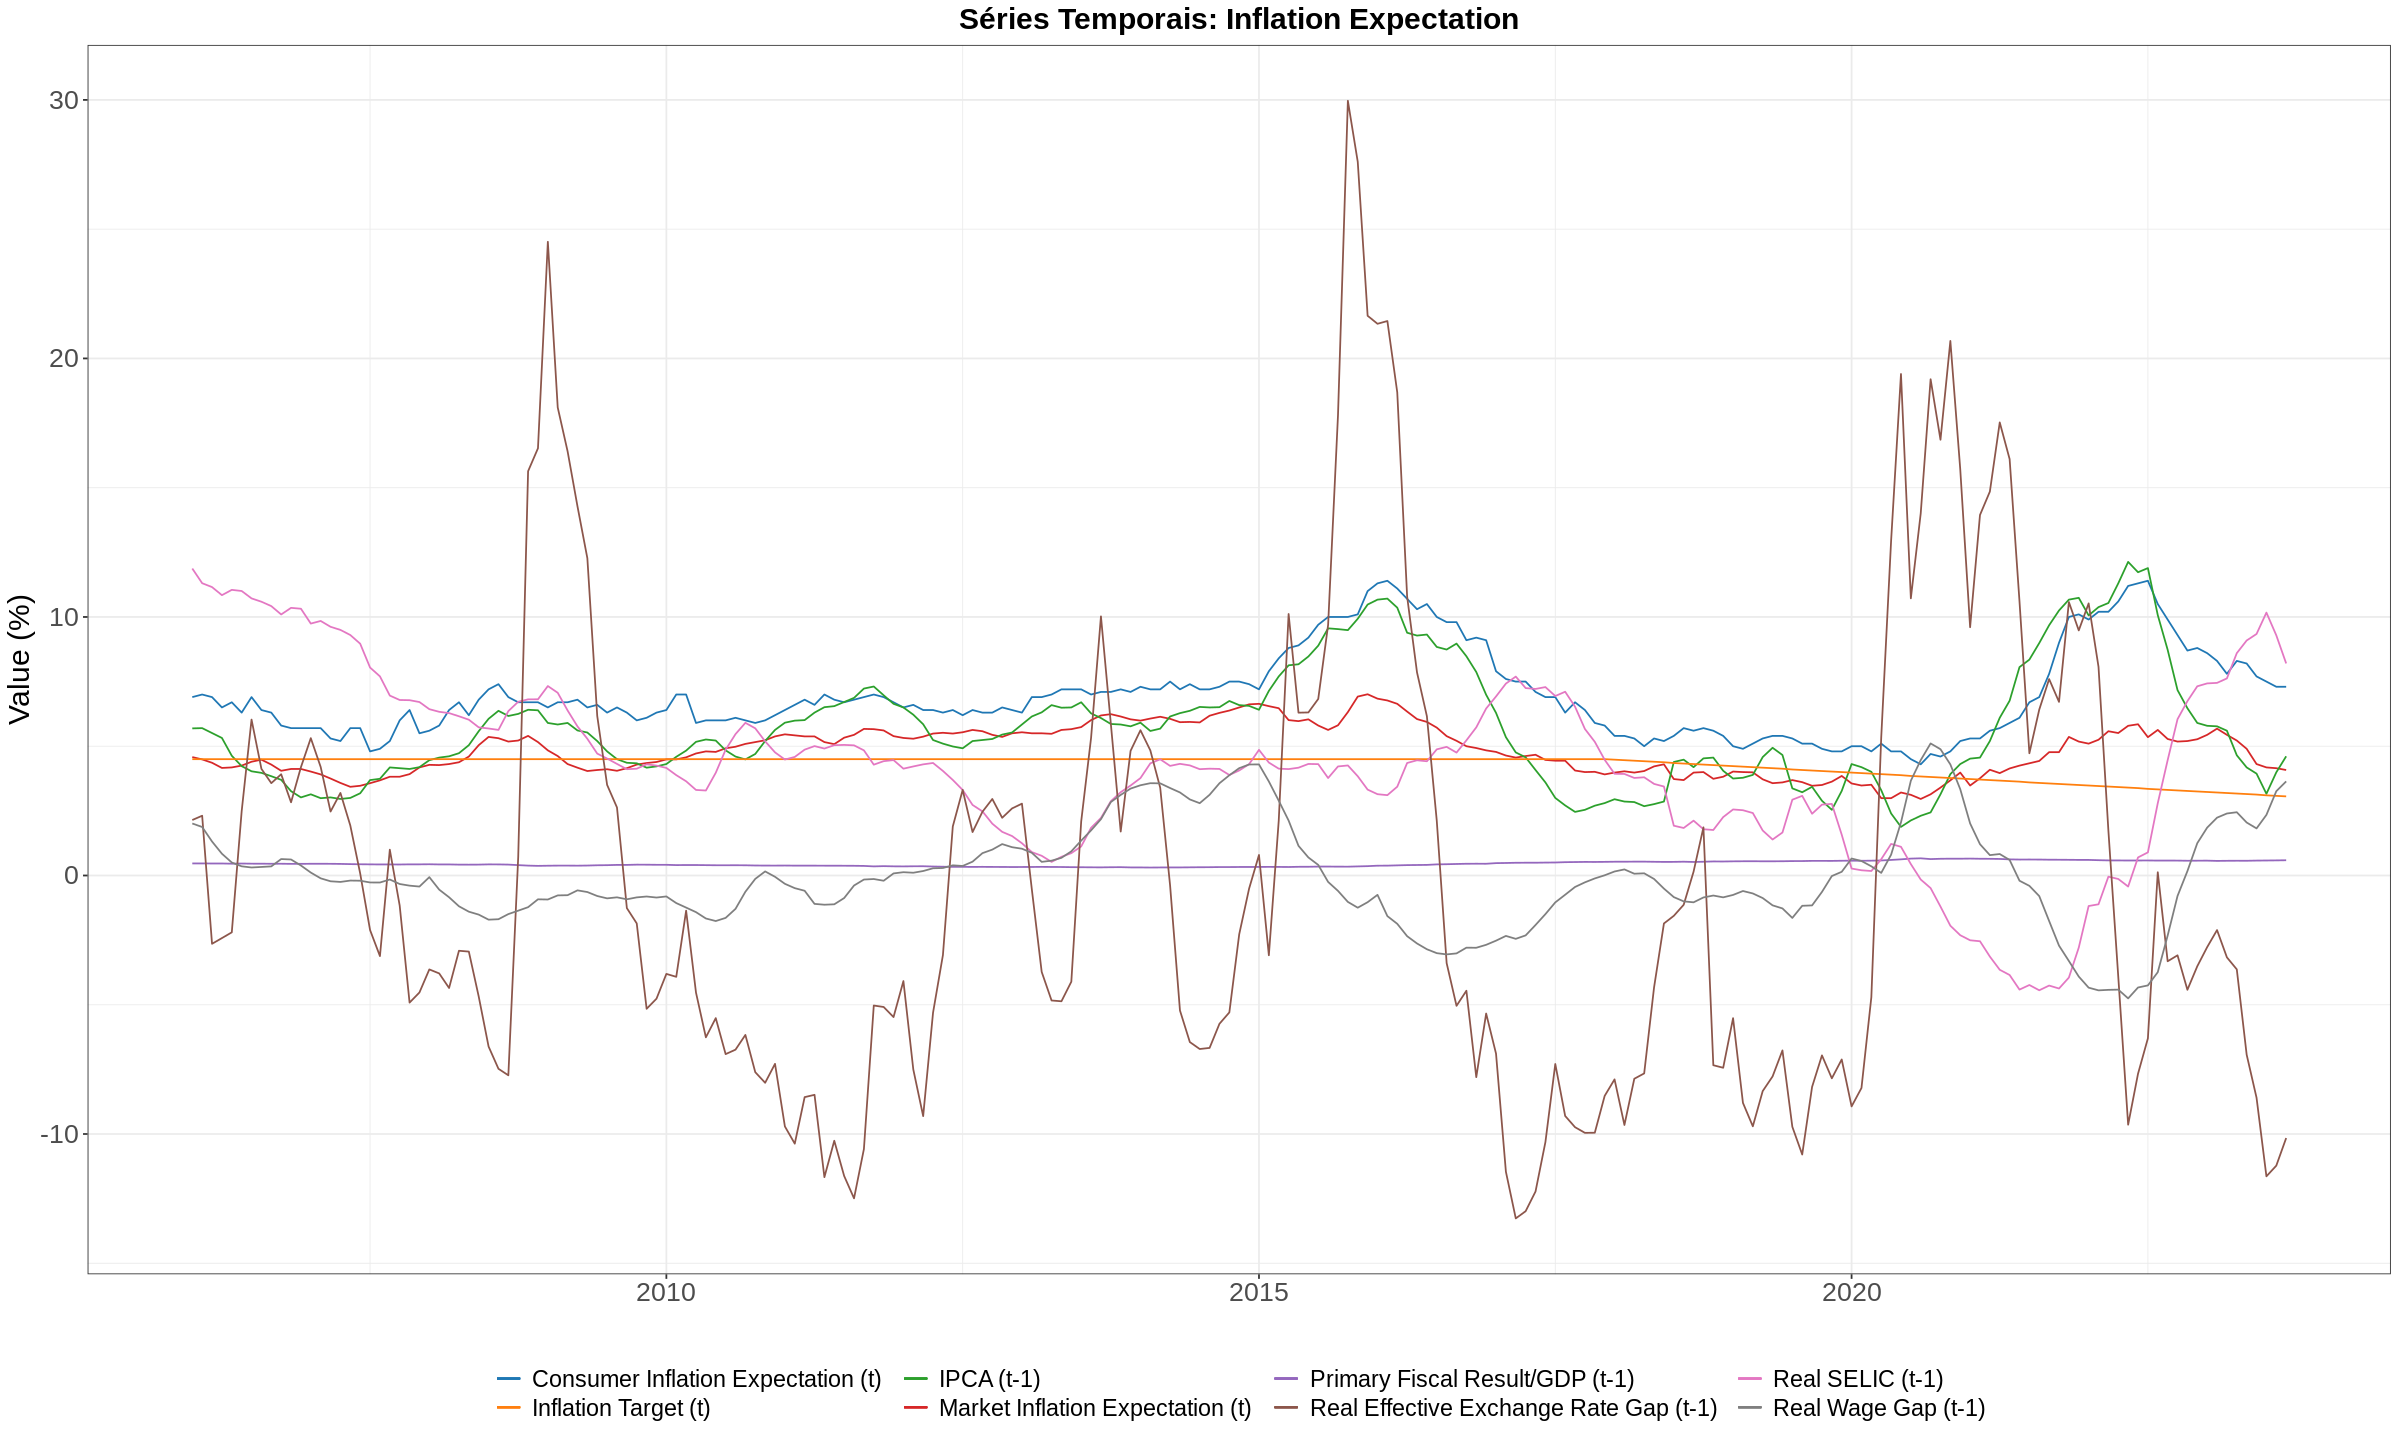

In [ ]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_to_gdp_lag, color = "Primary Fiscal Result/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_gap_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = real_household_income_gap_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&=
\alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Primary Fiscal Result/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1, 7]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 10%

> **Modelo econométrico**

In [118]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag - 1,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + real_household_income_gap_lag - 1,
    data = df_public_data)

In [119]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag - 1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60422 -0.39757  0.02267  0.41566  1.65376 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.7843487  0.0214471  36.571   <2e-16 ***
inflation_target_wtd_avg          0.0872321  0.0507712   1.718   0.0873 .  
primary_fiscal_result_to_gdp_lag  3.0309813  0.3214195   9.430   <2e-16 ***
selic_deflated_lag                0.1774676  0.0144611  12.272   <2e-16 ***
real_exchange_rate_gap_lag       -0.0009715  0.0052941  -0.184   0.8546    
real_household_income_gap_lag     0.0439200  0.0246081   1.785   0.0758 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.625 on 207

In [120]:
tidy( consumer_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.7843486762,0.021447082,36.5713475,2.746645e-92
inflation_target_wtd_avg,0.0872320507,0.050771152,1.7181420,8.726600e-02
primary_fiscal_result_to_gdp_lag,3.0309812769,0.321419535,9.4299846,8.619614e-18
selic_deflated_lag,0.1774675720,0.014461137,12.2720345,2.261184e-26
real_exchange_rate_gap_lag,-0.0009715375,0.005294113,-0.1835128,8.545753e-01
real_household_income_gap_lag,0.0439199905,0.024608062,1.7847805,7.576134e-02


**Resultado**

- Apenas a variável `real_exchange_rate_gap_lag` não é estatisticamente significativa dado o nível de significância β escolhido.

In [123]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_to_gdp_lag + selic_deflated_lag + real_exchange_rate_gap_lag + 
    real_household_income_gap_lag - 1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08593 -0.30074  0.03991  0.29168  0.98421 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
ipca_lag                          0.424256   0.014125  30.036  < 2e-16 ***
inflation_target_wtd_avg          0.644159   0.033438  19.264  < 2e-16 ***
primary_fiscal_result_to_gdp_lag -0.985760   0.211688  -4.657 5.74e-06 ***
selic_deflated_lag                0.029762   0.009524   3.125  0.00203 ** 
real_exchange_rate_gap_lag       -0.019103   0.003487  -5.479 1.24e-07 ***
real_household_income_gap_lag     0.211910   0.016207  13.075  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4116 on 207 degrees

In [124]:
tidy( market_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.42425576,0.014125129,30.035532,2.162365e-77
inflation_target_wtd_avg,0.64415911,0.033438072,19.264242,4.713023e-48
primary_fiscal_result_to_gdp_lag,-0.98576022,0.211688117,-4.656663,5.740153e-06
selic_deflated_lag,0.02976165,0.009524159,3.124859,2.034116e-03
real_exchange_rate_gap_lag,-0.01910332,0.003486723,-5.478877,1.235553e-07
real_household_income_gap_lag,0.21190953,0.016206963,13.075216,7.085327e-29


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

> ### **Distribuição dos Resíduos**

In [125]:
consumer_residuals <- residuals(consumer_linear_model)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [126]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean  St. Dev.  Min  Max 
---------------------------------------
residuals 213 0.004   0.62   -1.60 1.65
---------------------------------------


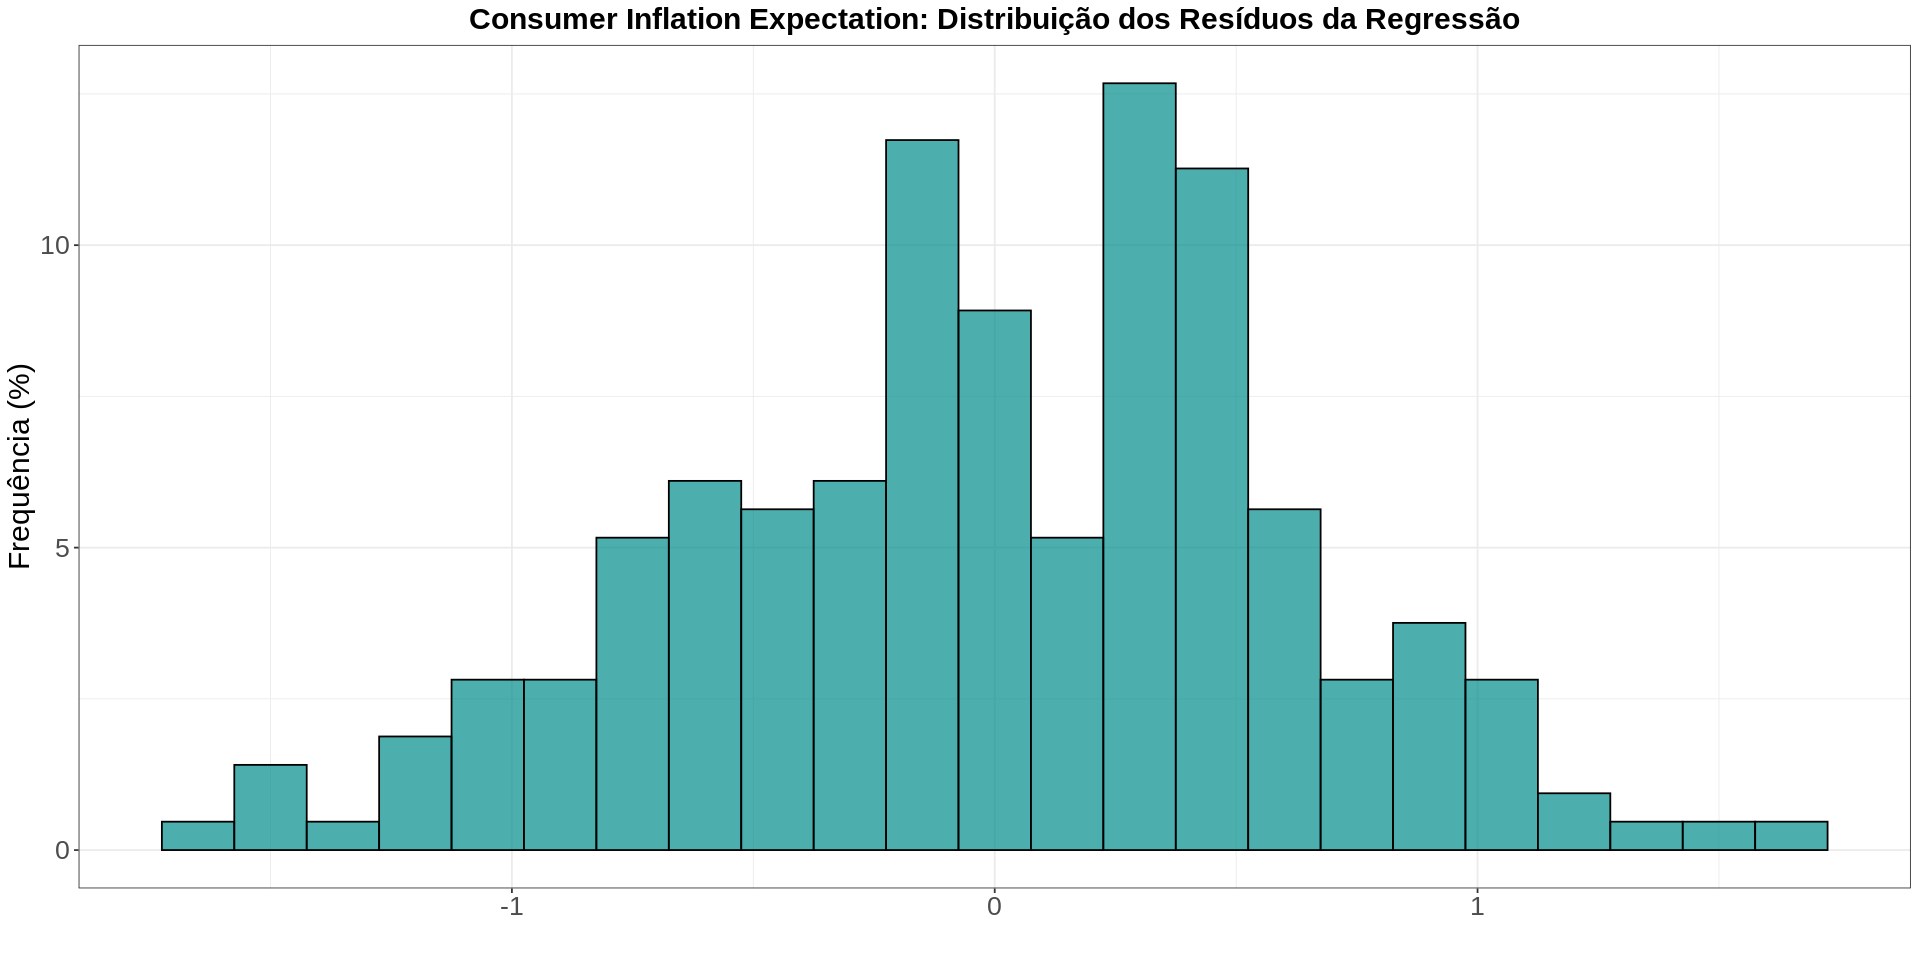

In [127]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Frequência (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [128]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 213 0.01   0.41   -1.09 0.98
--------------------------------------


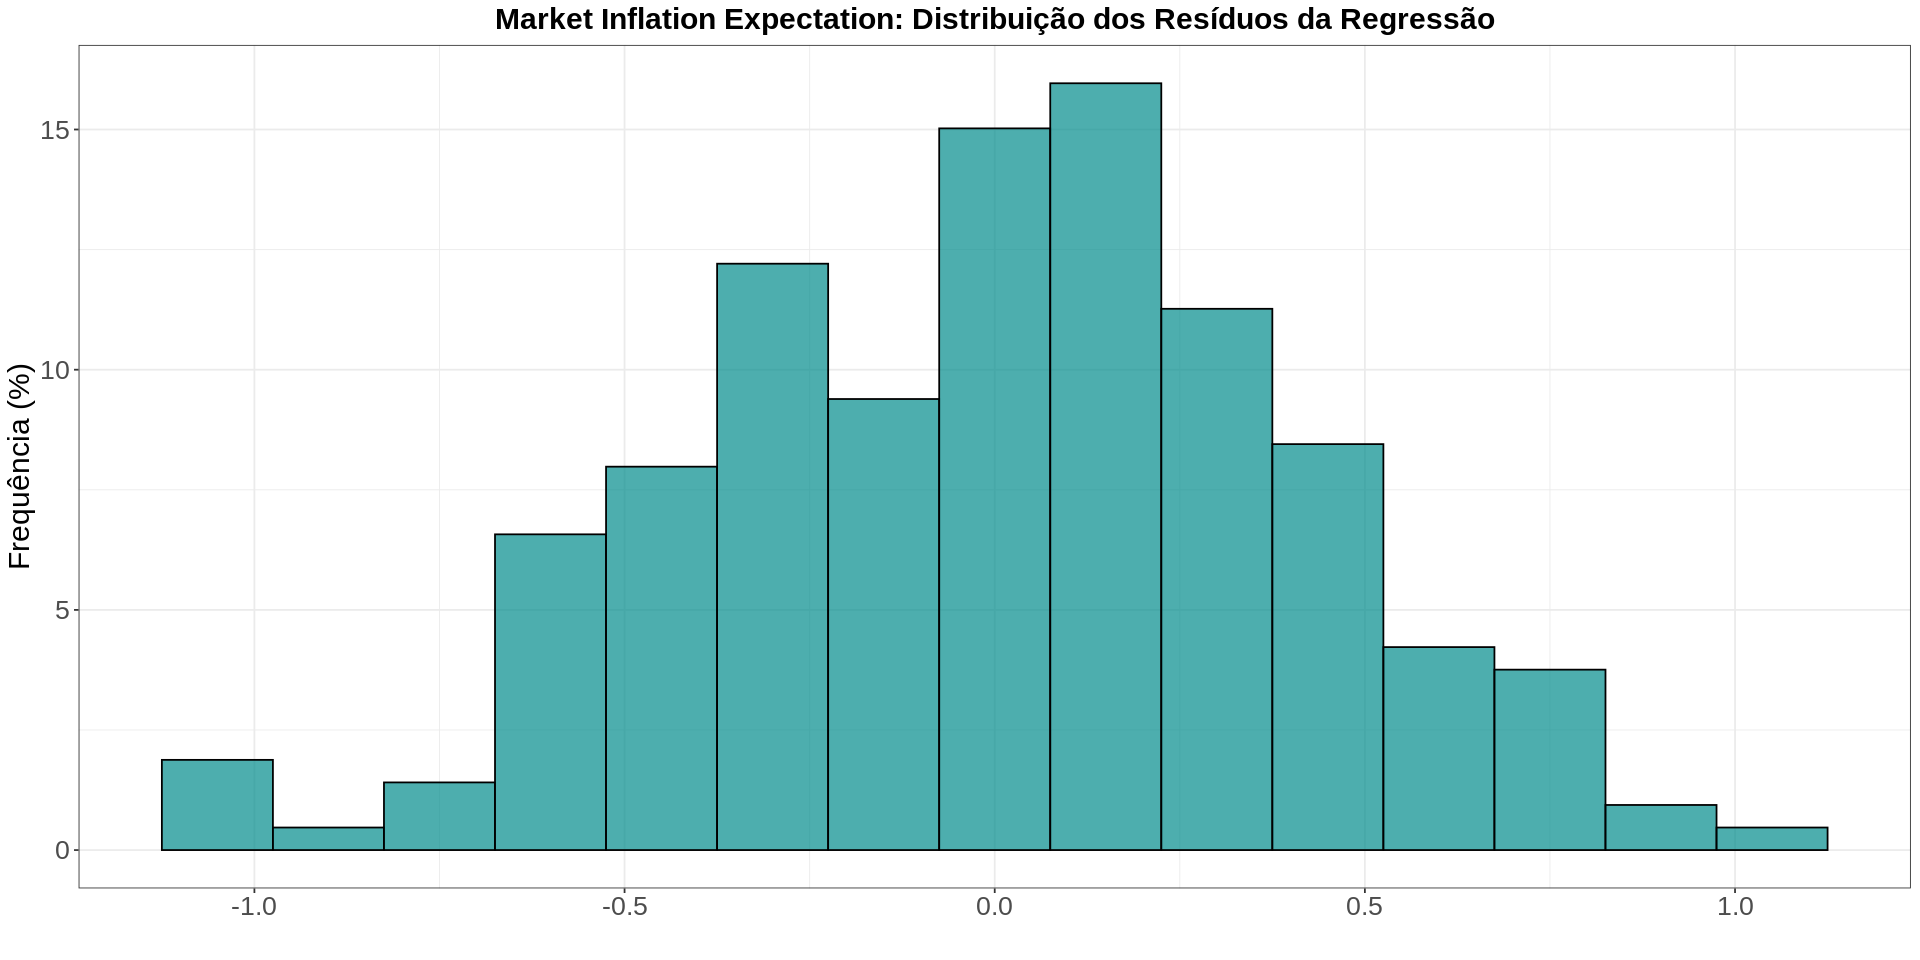

In [129]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Frequência (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Estacionariedade dos Resíduos**

> **ADF (Augmented Dickey-Fuller)**

- Nível de Significância
  * α = 5%

- Testes de Hipótese
  * **tau3**
    * Hipótese nula: possui raiz unitária
  * **phi2**
    * Hipótese nula: possui raiz unitária, sem tendência e sem drift
  * **phi3**
    * Hipótese nula: possui raiz unitária e sem tendência

In [130]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06818 -0.16834 -0.01136  0.16685  0.99173 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0378242  0.0520650  -0.726  0.46846   
z.lag.1      -0.1777422  0.0573068  -3.102  0.00223 **
tt            0.0004160  0.0004186   0.994  0.32162   
z.diff.lag1   0.0478605  0.0801591   0.597  0.55119   
z.diff.lag2  -0.0210298  0.0805772  -0.261  0.79439   
z.diff.lag3   0.0452849  0.0801682   0.565  0.57284   
z.diff.lag4  -0.0306593  0.0798160  -0.384  0.70133   
z.diff.lag5   0.0778031  0.0785616   0.990  0.32330   
z.diff.lag6   0.0307585  0.0793349   0.388  0.69868   
z.diff.lag7   0.0405220  0.0770589   0.526  0.59962   
z.diff.lag8  -0.0263850  0.0769723  -0.343 

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [131]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94482 -0.11511  0.01942  0.11192  0.88542 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0115595  0.0362331  -0.319 0.750062    
z.lag.1      -0.2617924  0.0841911  -3.110 0.002170 ** 
tt            0.0001898  0.0002898   0.655 0.513197    
z.diff.lag1   0.2235693  0.0936374   2.388 0.017966 *  
z.diff.lag2  -0.0201946  0.0948050  -0.213 0.831552    
z.diff.lag3   0.0955945  0.0897982   1.065 0.288468    
z.diff.lag4   0.0001153  0.0909282   0.001 0.998990    
z.diff.lag5  -0.0202619  0.0870600  -0.233 0.816225    
z.diff.lag6   0.0175797  0.0830765   0.212 0.832645    
z.diff.lag7  -0.0840362  0.0808803  -1.039 0.300152    
z.diff.lag8  -0.1153988  0.07739

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- Nível de Significância
  * α = 5%

- Teste de Hipótese
  * $H_0$: não possui raiz unitária

In [132]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2779 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [133]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1708 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> ### **Análise de Coeficientes**

In [134]:
# Consumer Inflation Expectation

# Extrair os coeficientes do modelo linear
consumer_coefficients <- coef(consumer_linear_model)

consumer_model_ipca_lag_weight <- consumer_coefficients[1]
consumer_model_inflation_target_wtd_avg_weight <- consumer_coefficients[2]
consumer_model_primary_fiscal_result_to_gdp_lag_weight <- consumer_coefficients[3]
consumer_model_selic_deflated_lag_weight <- consumer_coefficients[4]
consumer_model_real_exchange_rate_gap_lag_weight <- consumer_coefficients[5]
consumer_model_real_household_income_gap_lag_weight <- consumer_coefficients[6]

# Dataset para análise da previsão
consumer_analysis <- df_public_data %>% select(month, consumer_inflation_expectation, ipca_lag, inflation_target_wtd_avg, primary_fiscal_result_to_gdp_lag, selic_deflated_lag, real_exchange_rate_gap_lag, real_household_income_gap_lag)

consumer_analysis$ipca_lag <- consumer_analysis$ipca_lag * consumer_model_ipca_lag_weight
consumer_analysis$inflation_target_wtd_avg <- consumer_analysis$inflation_target_wtd_avg * consumer_model_inflation_target_wtd_avg_weight
consumer_analysis$primary_fiscal_result_to_gdp_lag <- consumer_analysis$primary_fiscal_result_to_gdp_lag * consumer_model_primary_fiscal_result_to_gdp_lag_weight
consumer_analysis$selic_deflated_lag <- consumer_analysis$selic_deflated_lag * consumer_model_selic_deflated_lag_weight
consumer_analysis$real_exchange_rate_gap_lag <- consumer_analysis$real_exchange_rate_gap_lag * consumer_model_real_exchange_rate_gap_lag_weight
consumer_analysis$real_household_income_gap_lag <- consumer_analysis$real_household_income_gap_lag * consumer_model_real_household_income_gap_lag_weight

consumer_analysis$consumer_inflation_expectation_predicted <- consumer_analysis$ipca_lag + consumer_analysis$inflation_target_wtd_avg + consumer_analysis$primary_fiscal_result_to_gdp_lag + consumer_analysis$selic_deflated_lag + consumer_analysis$real_exchange_rate_gap_lag + consumer_analysis$real_household_income_gap_lag

# Impacto de cada variável
consumer_analysis_pct <- consumer_analysis %>% select(month)

consumer_analysis_pct$ipca <- 100.0 * abs(consumer_analysis$ipca_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))
consumer_analysis_pct$inflation_target <- 100.0 * abs(consumer_analysis$inflation_target_wtd_avg) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))
consumer_analysis_pct$primary_fiscal_result_to_gdp <- 100.0 * abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))
consumer_analysis_pct$selic_deflated <- 100.0 * abs(consumer_analysis$selic_deflated_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))
consumer_analysis_pct$real_exchange_rate_gap <- 100.0 * abs(consumer_analysis$real_exchange_rate_gap_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))
consumer_analysis_pct$real_household_income_gap <- 100.0 * abs(consumer_analysis$real_household_income_gap_lag) / (abs(consumer_analysis$ipca_lag) + abs(consumer_analysis$inflation_target_wtd_avg) + abs(consumer_analysis$primary_fiscal_result_to_gdp_lag) + abs(consumer_analysis$selic_deflated_lag) + abs(consumer_analysis$real_exchange_rate_gap_lag) + abs(consumer_analysis$real_household_income_gap_lag))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


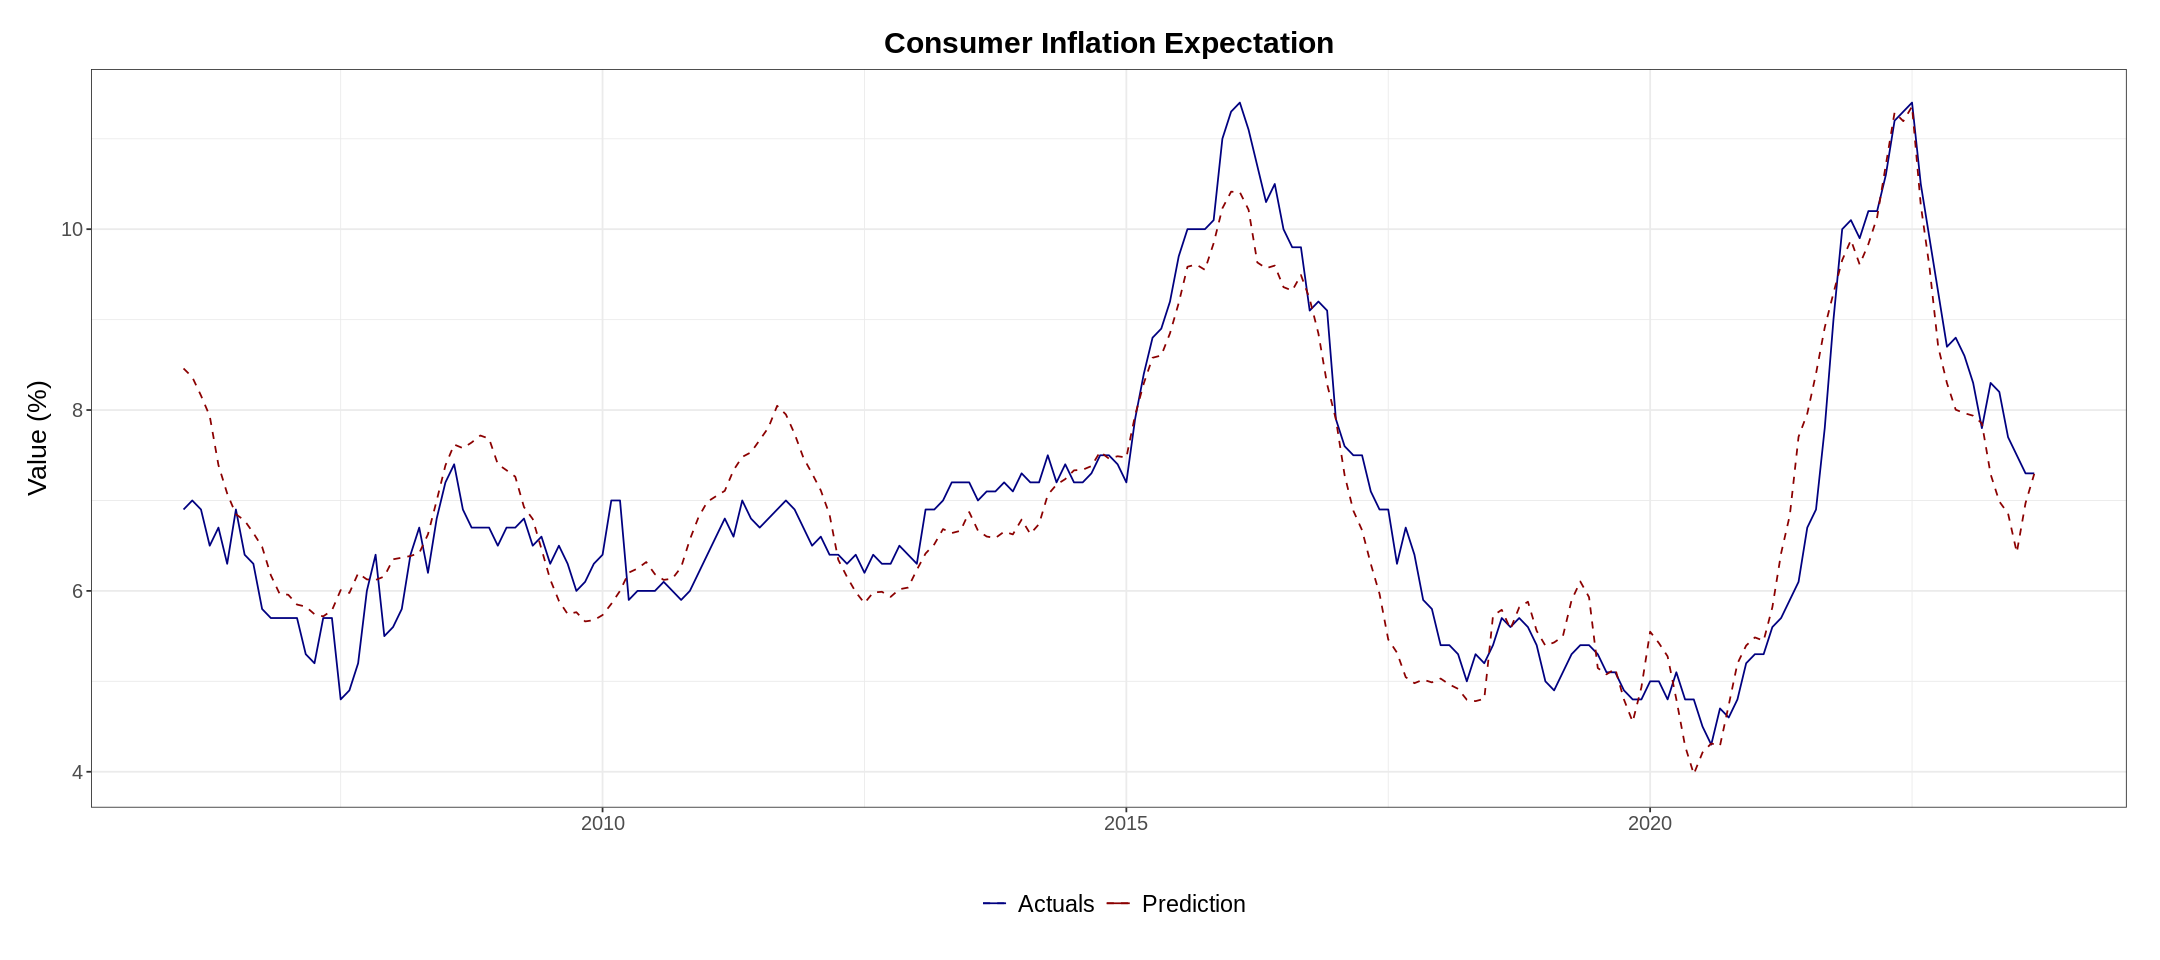

In [135]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 8)

# Plotar as séries temporais de "consumer_inflation_expectation" e "consumer_inflation_expectation_predicted"
ggplot(consumer_analysis) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Actuals")) +
  geom_line(aes(x = month, y = consumer_inflation_expectation_predicted, color = "Prediction"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Consumer Inflation Expectation") +
  scale_color_manual(values = c("navy", "darkred"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

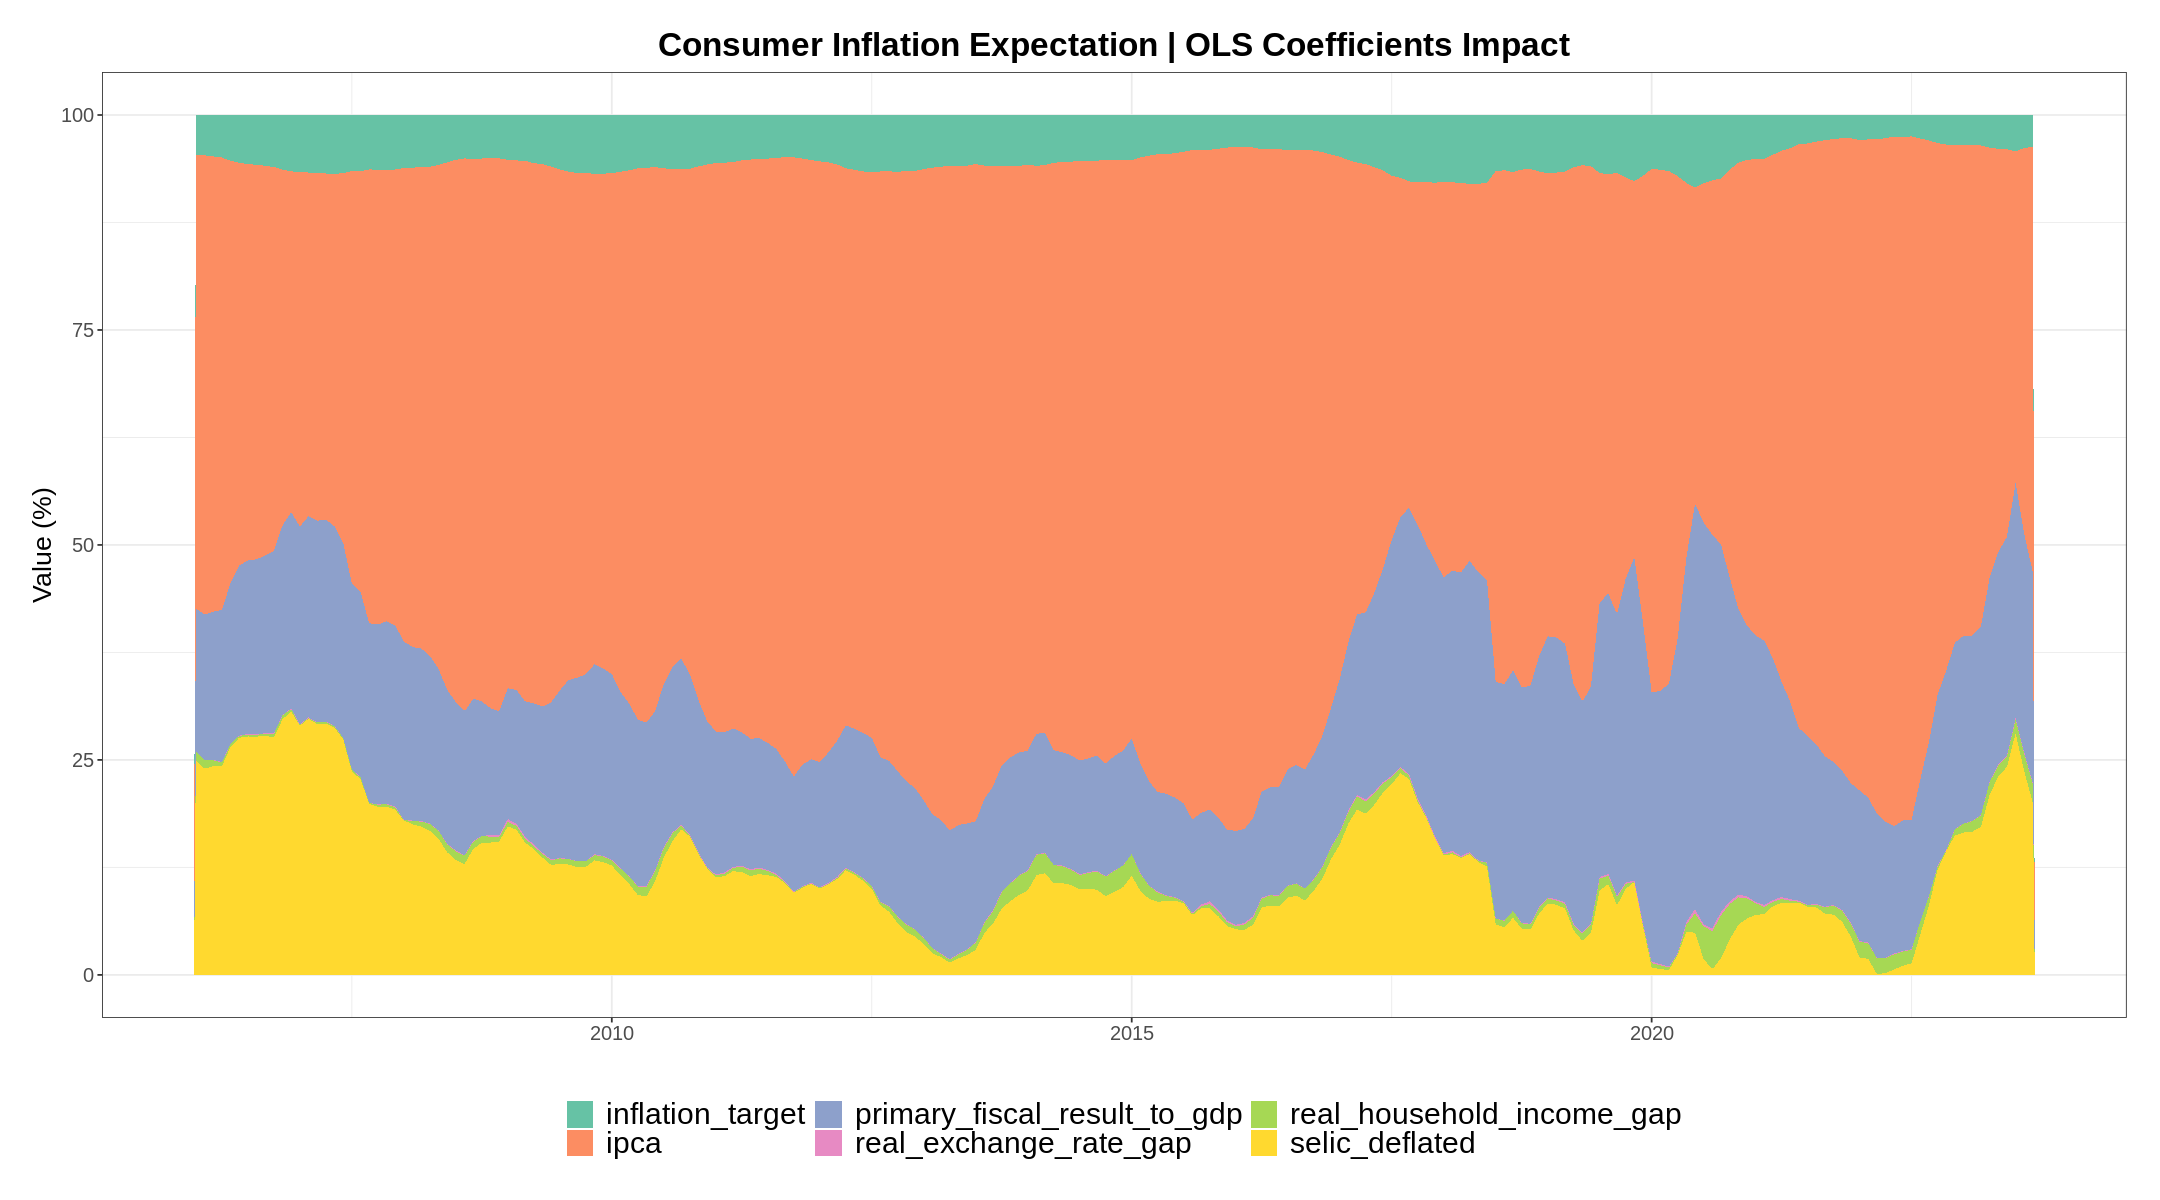

In [136]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Transforme o dataframe em um formato longo (tidy data)
consumer_analysis_pct_long <- consumer_analysis_pct %>%
  pivot_longer(cols = -month, names_to = "Variable", values_to = "Value")

# Use a paleta de cores Set2
set2_palette <- brewer.pal(n = 7, name = "Set2")

# Crie o gráfico de área empilhada com a paleta de cores Set1
ggplot(consumer_analysis_pct_long, aes(x = month, y = Value, fill = Variable)) +
  geom_area() +
  labs(x = "", y = "Value (%)", title = "Consumer Inflation Expectation | OLS Coefficients Impact") +
  scale_fill_manual(values = set2_palette, name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 14),
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 1),
    axis.title.x = element_text(size = 16),
    plot.caption = element_text(size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )

In [137]:
# Market Inflation Expectation

# Extrair os coeficientes do modelo linear
market_coefficients <- coef(market_linear_model)

market_model_ipca_lag_weight <- market_coefficients[1]
market_model_inflation_target_wtd_avg_weight <- market_coefficients[2]
market_model_primary_fiscal_result_to_gdp_lag_weight <- market_coefficients[3]
market_model_selic_deflated_lag_weight <- market_coefficients[4]
market_model_real_exchange_rate_gap_lag_weight <- market_coefficients[5]
market_model_real_household_income_gap_lag_weight <- market_coefficients[6]

# Dataset para análise da previsão
market_analysis <- df_public_data %>% select(month, market_inflation_expectation, ipca_lag, inflation_target_wtd_avg, primary_fiscal_result_to_gdp_lag, selic_deflated_lag, real_exchange_rate_gap_lag, real_household_income_gap_lag)

market_analysis$ipca_lag <- market_analysis$ipca_lag * market_model_ipca_lag_weight
market_analysis$inflation_target_wtd_avg <- market_analysis$inflation_target_wtd_avg * market_model_inflation_target_wtd_avg_weight
market_analysis$primary_fiscal_result_to_gdp_lag <- market_analysis$primary_fiscal_result_to_gdp_lag * market_model_primary_fiscal_result_to_gdp_lag_weight
market_analysis$selic_deflated_lag <- market_analysis$selic_deflated_lag * market_model_selic_deflated_lag_weight
market_analysis$real_exchange_rate_gap_lag <- market_analysis$real_exchange_rate_gap_lag * market_model_real_exchange_rate_gap_lag_weight
market_analysis$real_household_income_gap_lag <- market_analysis$real_household_income_gap_lag * market_model_real_household_income_gap_lag_weight

market_analysis$market_inflation_expectation_predicted <- market_analysis$ipca_lag + market_analysis$inflation_target_wtd_avg + market_analysis$primary_fiscal_result_to_gdp_lag + market_analysis$selic_deflated_lag + market_analysis$real_exchange_rate_gap_lag + market_analysis$real_household_income_gap_lag

# Impacto de cada variável
market_analysis_pct <- market_analysis %>% select(month)

market_analysis_pct$ipca <- 100.0 * abs(market_analysis$ipca_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))
market_analysis_pct$inflation_target <- 100.0 * abs(market_analysis$inflation_target_wtd_avg) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))
market_analysis_pct$primary_fiscal_result_to_gdp <- 100.0 * abs(market_analysis$primary_fiscal_result_to_gdp_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))
market_analysis_pct$selic_deflated <- 100.0 * abs(market_analysis$selic_deflated_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))
market_analysis_pct$real_exchange_rate_gap <- 100.0 * abs(market_analysis$real_exchange_rate_gap_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))
market_analysis_pct$real_household_income_gap <- 100.0 * abs(market_analysis$real_household_income_gap_lag) / (abs(market_analysis$ipca_lag) + abs(market_analysis$inflation_target_wtd_avg) + abs(market_analysis$primary_fiscal_result_to_gdp_lag) + abs(market_analysis$selic_deflated_lag) + abs(market_analysis$real_exchange_rate_gap_lag) + abs(market_analysis$real_household_income_gap_lag))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


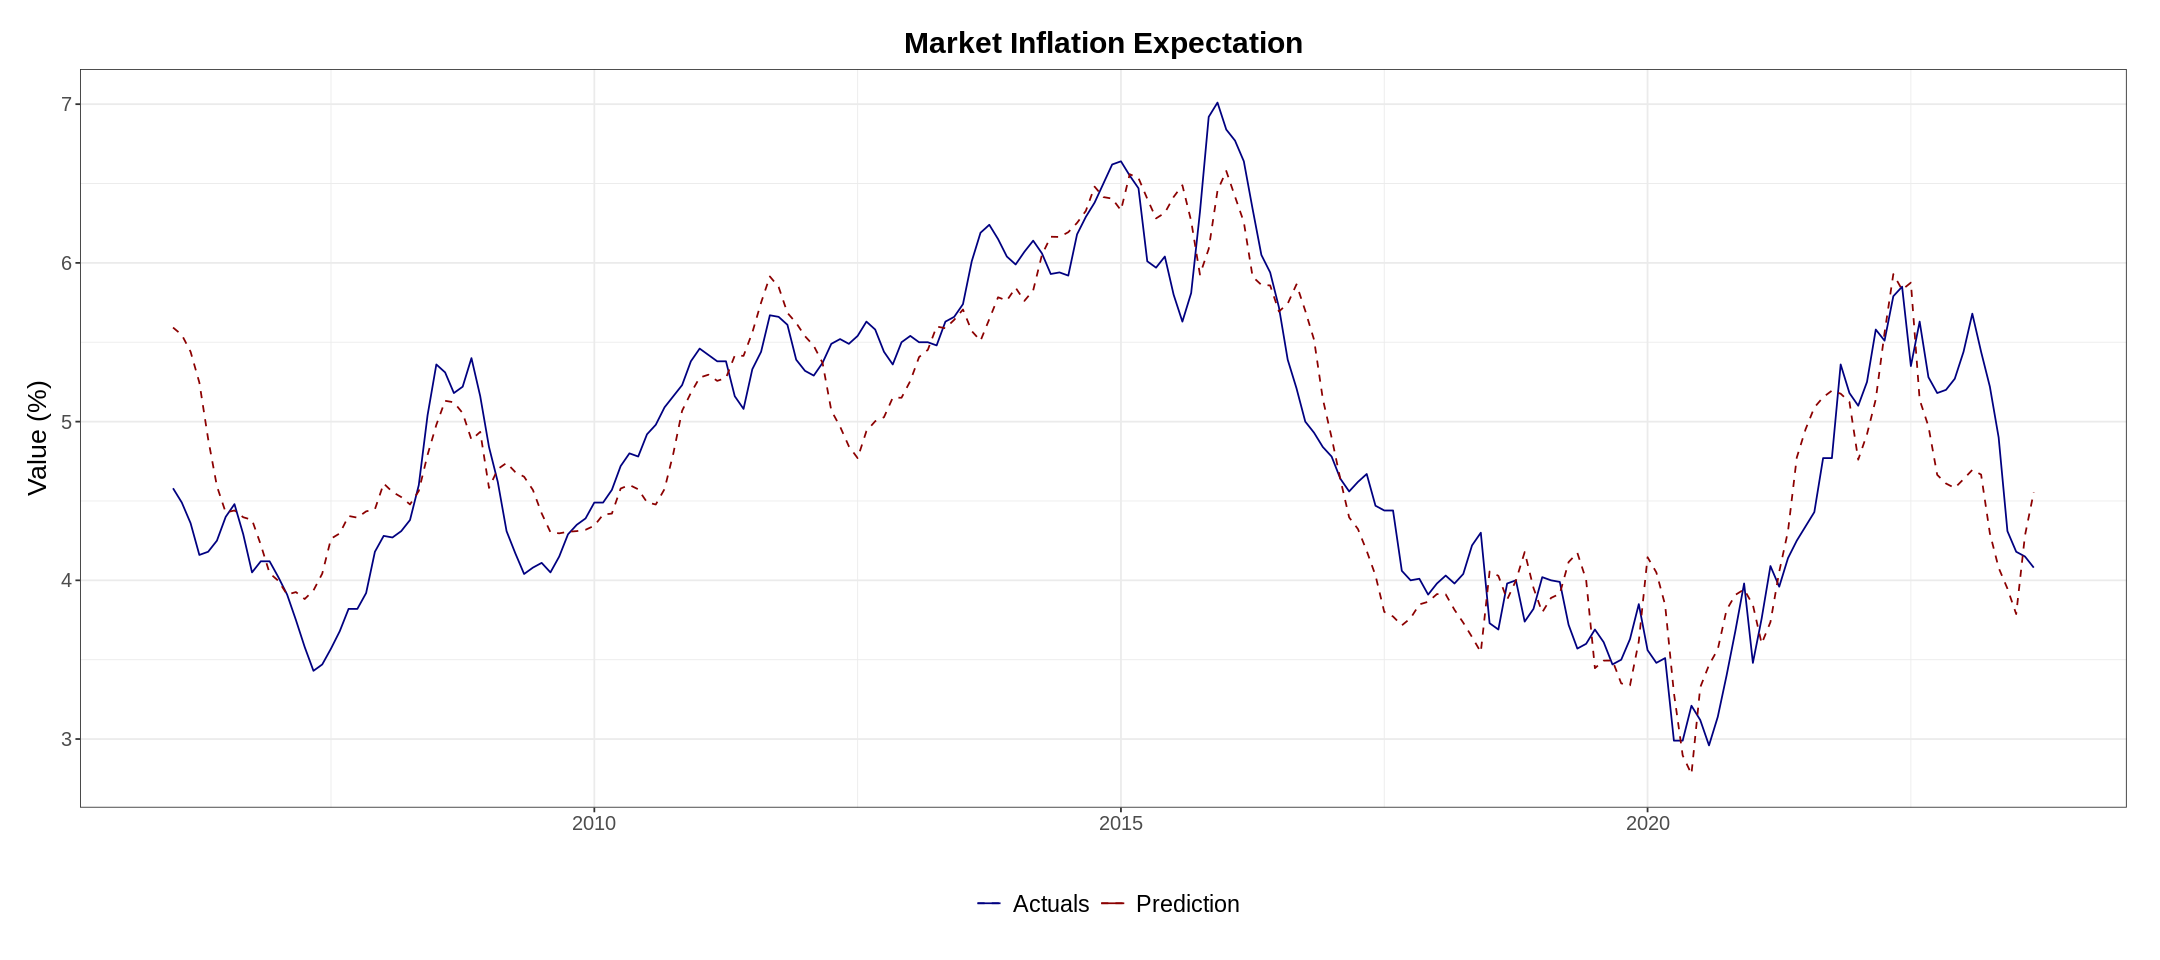

In [138]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 8)

# Plotar as séries temporais de "market_inflation_expectation" e "market_inflation_expectation_predicted"
ggplot(market_analysis) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Actuals")) +
  geom_line(aes(x = month, y = market_inflation_expectation_predicted, color = "Prediction"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Market Inflation Expectation") +
  scale_color_manual(values = c("navy", "darkred"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

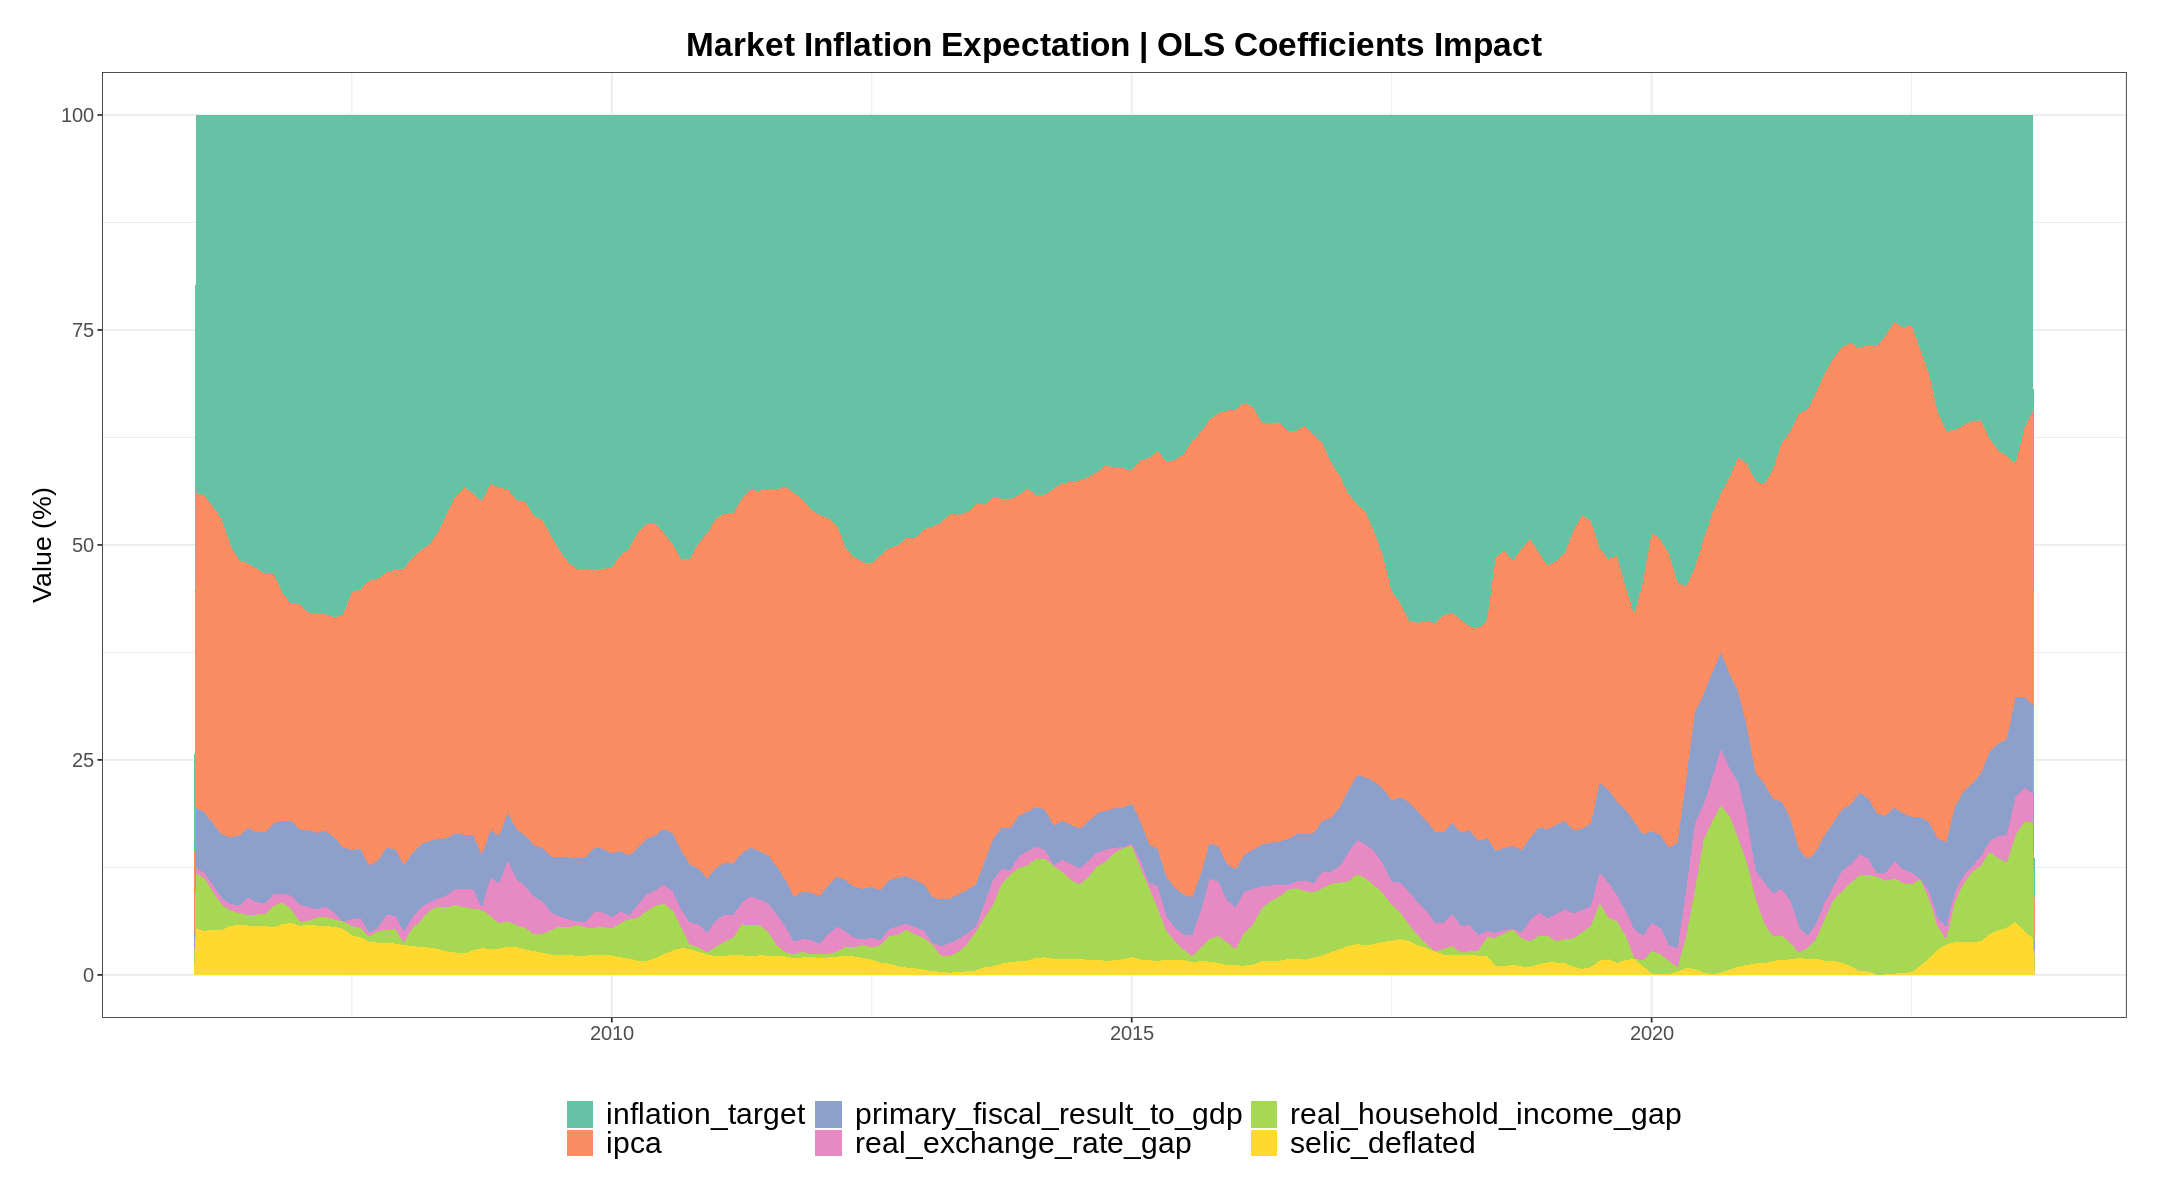

In [139]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Transforme o dataframe em um formato longo (tidy data)
market_analysis_pct_long <- market_analysis_pct %>%
  pivot_longer(cols = -month, names_to = "Variable", values_to = "Value")

# Use a paleta de cores Set1
set2_palette <- brewer.pal(n = 7, name = "Set2")

# Crie o gráfico de área empilhada com a paleta de cores Set1
ggplot(market_analysis_pct_long, aes(x = month, y = Value, fill = Variable)) +
  geom_area() +
  labs(x = "", y = "Value (%)", title = "Market Inflation Expectation | OLS Coefficients Impact") +
  scale_fill_manual(values = set2_palette, name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 14),
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 1),
    axis.title.x = element_text(size = 16),
    plot.caption = element_text(size = 12),
    plot.margin = margin(20, 20, 20, 20)
  )